<h1> Interpolação Polinomial</h1>
<h3> Testes dos métodos implementados em C (via DLL)</h3>

In [1]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt

# Carrega a biblioteca
# Certifique-se de que a DLL foi recompilada com as novas funções!
lib = ctypes.CDLL("./metodos.dll")

# Tipos de array C
DoubleArray = ctypes.POINTER(ctypes.c_double)
VoidPtr = ctypes.c_void_p

# --- 1. Interpolação por Definição (Sistema Linear) ---
lib.interpolacao_definicao_coeffs.restype = DoubleArray
lib.interpolacao_definicao_coeffs.argtypes = [ctypes.c_int, DoubleArray, DoubleArray]

lib.calcula_polinomio.restype = ctypes.c_double
lib.calcula_polinomio.argtypes = [ctypes.c_double, DoubleArray, ctypes.c_int]

# --- 2. Interpolação de Lagrange ---
lib.lagrange_cria_polinomio.restype = DoubleArray
lib.lagrange_cria_polinomio.argtypes = [ctypes.c_int, DoubleArray, DoubleArray]

lib.lagrange_resulta_polinomio.restype = ctypes.c_double
lib.lagrange_resulta_polinomio.argtypes = [ctypes.c_double, DoubleArray, DoubleArray, ctypes.c_int]

# --- 3. Interpolação de Newton ---
lib.coeficientes_newton.restype = DoubleArray
lib.coeficientes_newton.argtypes = [ctypes.c_int, DoubleArray, DoubleArray]

lib.interpolacao_newton.restype = ctypes.c_double
lib.interpolacao_newton.argtypes = [ctypes.c_int, DoubleArray, DoubleArray, ctypes.c_double]

# --- Função de Limpeza ---
lib.free_memory.restype = None
lib.free_memory.argtypes = [VoidPtr]

## Dados de Exemplo

Vamos usar 4 pontos para encontrar um polinômio de grau 3.

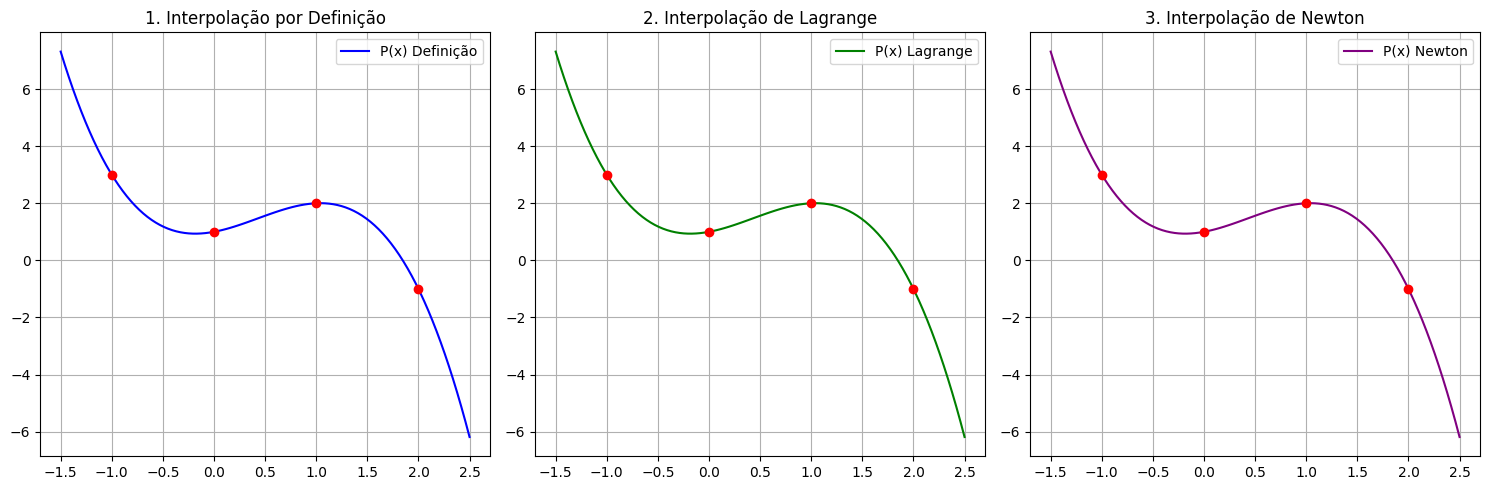

In [2]:
# Pontos de exemplo (x, y)
x_pontos = np.array([-1.0, 0.0, 1.0, 2.0])
y_pontos = np.array([3.0, 1.0, 2.0, -1.0])
n = len(x_pontos)

# Converte os arrays numpy para tipos que o ctypes entende
DoubleArrayType_n = ctypes.c_double * n
x_c = DoubleArrayType_n(*x_pontos)
y_c = DoubleArrayType_n(*y_pontos)

# Eixo x para plotar o polinômio contínuo
xs = np.linspace(min(x_pontos) - 0.5, max(x_pontos) + 0.5, 100)

plt.figure(figsize=(15, 5))

# --- Gráfico 1: Interpolação por Definição ---
plt.subplot(1, 3, 1)
coeffs_def = lib.interpolacao_definicao_coeffs(n, x_c, y_c)
ys_def = [lib.calcula_polinomio(float(xi), coeffs_def, n) for xi in xs]

plt.plot(xs, ys_def, color='blue', label='P(x) Definição')
plt.scatter(x_pontos, y_pontos, color='red', zorder=5)
plt.title('1. Interpolação por Definição')
plt.legend()
plt.grid(True)
lib.free_memory(coeffs_def) # Libera a memória alocada pelo C

# --- Gráfico 2: Interpolação de Lagrange ---
plt.subplot(1, 3, 2)
coeffs_lag = lib.lagrange_cria_polinomio(n, x_c, y_c)
ys_lag = [lib.lagrange_resulta_polinomio(float(xi), coeffs_lag, x_c, n) for xi in xs]

plt.plot(xs, ys_lag, color='green', label='P(x) Lagrange')
plt.scatter(x_pontos, y_pontos, color='red', zorder=5)
plt.title('2. Interpolação de Lagrange')
plt.legend()
plt.grid(True)
lib.free_memory(coeffs_lag) # Libera a memória alocada pelo C

# --- Gráfico 3: Interpolação de Newton ---
plt.subplot(1, 3, 3)
coeffs_new = lib.coeficientes_newton(n, x_c, y_c)
ys_new = [lib.interpolacao_newton(n, x_c, coeffs_new, float(xi)) for xi in xs]

plt.plot(xs, ys_new, color='purple', label='P(x) Newton')
plt.scatter(x_pontos, y_pontos, color='red', zorder=5)
plt.title('3. Interpolação de Newton')
plt.legend()
plt.grid(True)
lib.free_memory(coeffs_new) # Libera a memória alocada pelo C


plt.tight_layout()
plt.show()

### Verificando os Coeficientes (Newton)
Os coeficientes da interpolação de Newton (diferenças divididas) podem ser impressos para verificação:

In [3]:
coeffs_newton_check = lib.coeficientes_newton(n, x_c, y_c)
print(f"Coeficientes de Newton (Diferenças Divididas) para n={n}:")
for i in range(n):
    print(f"d[{i}] = {coeffs_newton_check[i]}")

lib.free_memory(coeffs_newton_check)

Coeficientes de Newton (Diferenças Divididas) para n=4:
d[0] = 3.0
d[1] = -2.0
d[2] = 1.5
d[3] = -1.1666666666666667
